<h1>Classification of Polluted Silicone Rubber Insulators by Using LIBS Assisted Machine Learning Techniques</h1>

![Image Title](image-3.png)

<h2>Tugas Besar Pemodelan dan Pembelajaran Mesin</h2>
<h3>Kelompok 1</h3>
<h4>1. Devin Ezekiel Purba          - 2106701583</h4> 
<h4>2. Hilmy Aditara Januarizkiansa - 2106631356</h4>
<h4>3. Nurul Aini Fauzyyah          - 2106702951</h4>
<h4>4. Khalisa Wintarirani          - 2106728345</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Exploratory Data Analysis</h2>
Exploratory Data Analysis dilakukan dengan melihat data yang ada pada grafik hasil komposisi dari pollutant pada coating dari material insulator yang menjadi bagian dari materi untuk klasifikasi tipe atau jenis komposisi coating dari insulator yang ada.

Proses dari data extraction pada jurnal pada dilihat pada flowchart berikut ini:

![Image Title](image-2.png)

Pada tabel ini, dapat dilihat komposisi coating dari SR Insulator pada setiap Tipe yang akan menjadi output dari model klasifikasi.

![Image Title](image.png)

Pada Grafik di bawah ini, dapat dilihat nilai-nilai puncak pada setiap komposisi yang menjadi fitur untuk model klasifikasi:

![Image Title](image-4.png) ![Image Title](image-5.png)



Dataset dibawah ini di generate menggunakan Microsoft Excel dengan melihat acuan data sebenarnya dari jurnal.
Randomizer data menggunakan Excel Formula sebagai berikut:

\begin{equation}
\text{random data} = NORM.INV(RAND();\text{data mean};\text{data standard deviation})
\end{equation}

<p align=justify>Dimana data yang didapatkan dari Figure 3 dan Figure 4 di-expand dengan randomizer dengan deviasi sebesar $\pm 100\%$  dari data peak pada grafik jurnal. Hal ini dapat dilihat dengan cara nilai mean data random yang digunakan adalah angka yang didapatkan dari data peak pada grafik dari jurnal, lalu standar deviasinya adalah 100% dari mean tersebut. Besaran tersebut merupakan spesifikasi yang diberikan untuk noise yang diberikan ke data random tersebut dengan menggunakan Inverse Gaussian Distribution atau Gaussian Noise dengan probabilitas random antara 0 dan 1 (pada fungsi RAND()).</p>


<h2>Feature Engineering</h2>

In [2]:
df = pd.read_csv('dataset_2.csv', sep=';')
df

Na I         Na II           H I           O I          O II  \
0       66000.00000   4000.000000   8000.000000   6000.000000   5000.000000   
1       59669.95085   5046.650401   3725.900231   7783.778286   3637.139855   
2      167411.33260   6077.750989    651.839070    425.315062    686.046860   
3       70164.71957   7874.544953  12421.153330  16345.480760    771.759121   
4       55243.69539   4019.277879   3383.737485  18429.201440  20113.917620   
...             ...           ...           ...           ...           ...   
13995   44284.55825  19930.693200  30911.425660   7420.726265  13283.954530   
13996  109734.71060  45558.981980  28360.821570    148.855039  70884.613630   
13997   78314.60841  15190.320410   9542.932099  23062.475040  21931.586340   
13998  119031.69240   6326.594870  21383.851410   5918.703441  26047.235990   
13999  113693.96240   6503.473274  15440.889630   1427.979376  19239.887260   

                N II        Si II         Cu I         Ca II          C II  \
0       18000.000000  33000.00000      0.00000      0.000000      0.000000   
1        9115.256328  12352.09382      0.00000      0.000000      0.000000   
2       16867.486240  41933.93162      0.00000      0.000000      0.000000   
3       24467.065210  46618.06057      0.00000      0.000000      0.000000   
4       43960.733660  25120.24814      0.00000      0.000000      0.000000   
...              ...          ...          ...           ...           ...   
13995   62925.551700  39270.58362  34828.23099  52414.160280   2686.194267   
13996   67256.164620   5204.74646  14193.87291   9569.789993  35137.456220   
13997   78106.874180  26423.76968  29630.99304  71810.126270  16750.294410   
13998  124594.852600  19942.08201  24043.80406  42515.126290    665.330766   
13999   61694.224350  35283.05676  23323.24508  21973.434390  34258.164090   

       Type  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
13995     7  
13996     7  
13997     7  
13998     7  
13999     7  

[14000 rows x 11 columns]

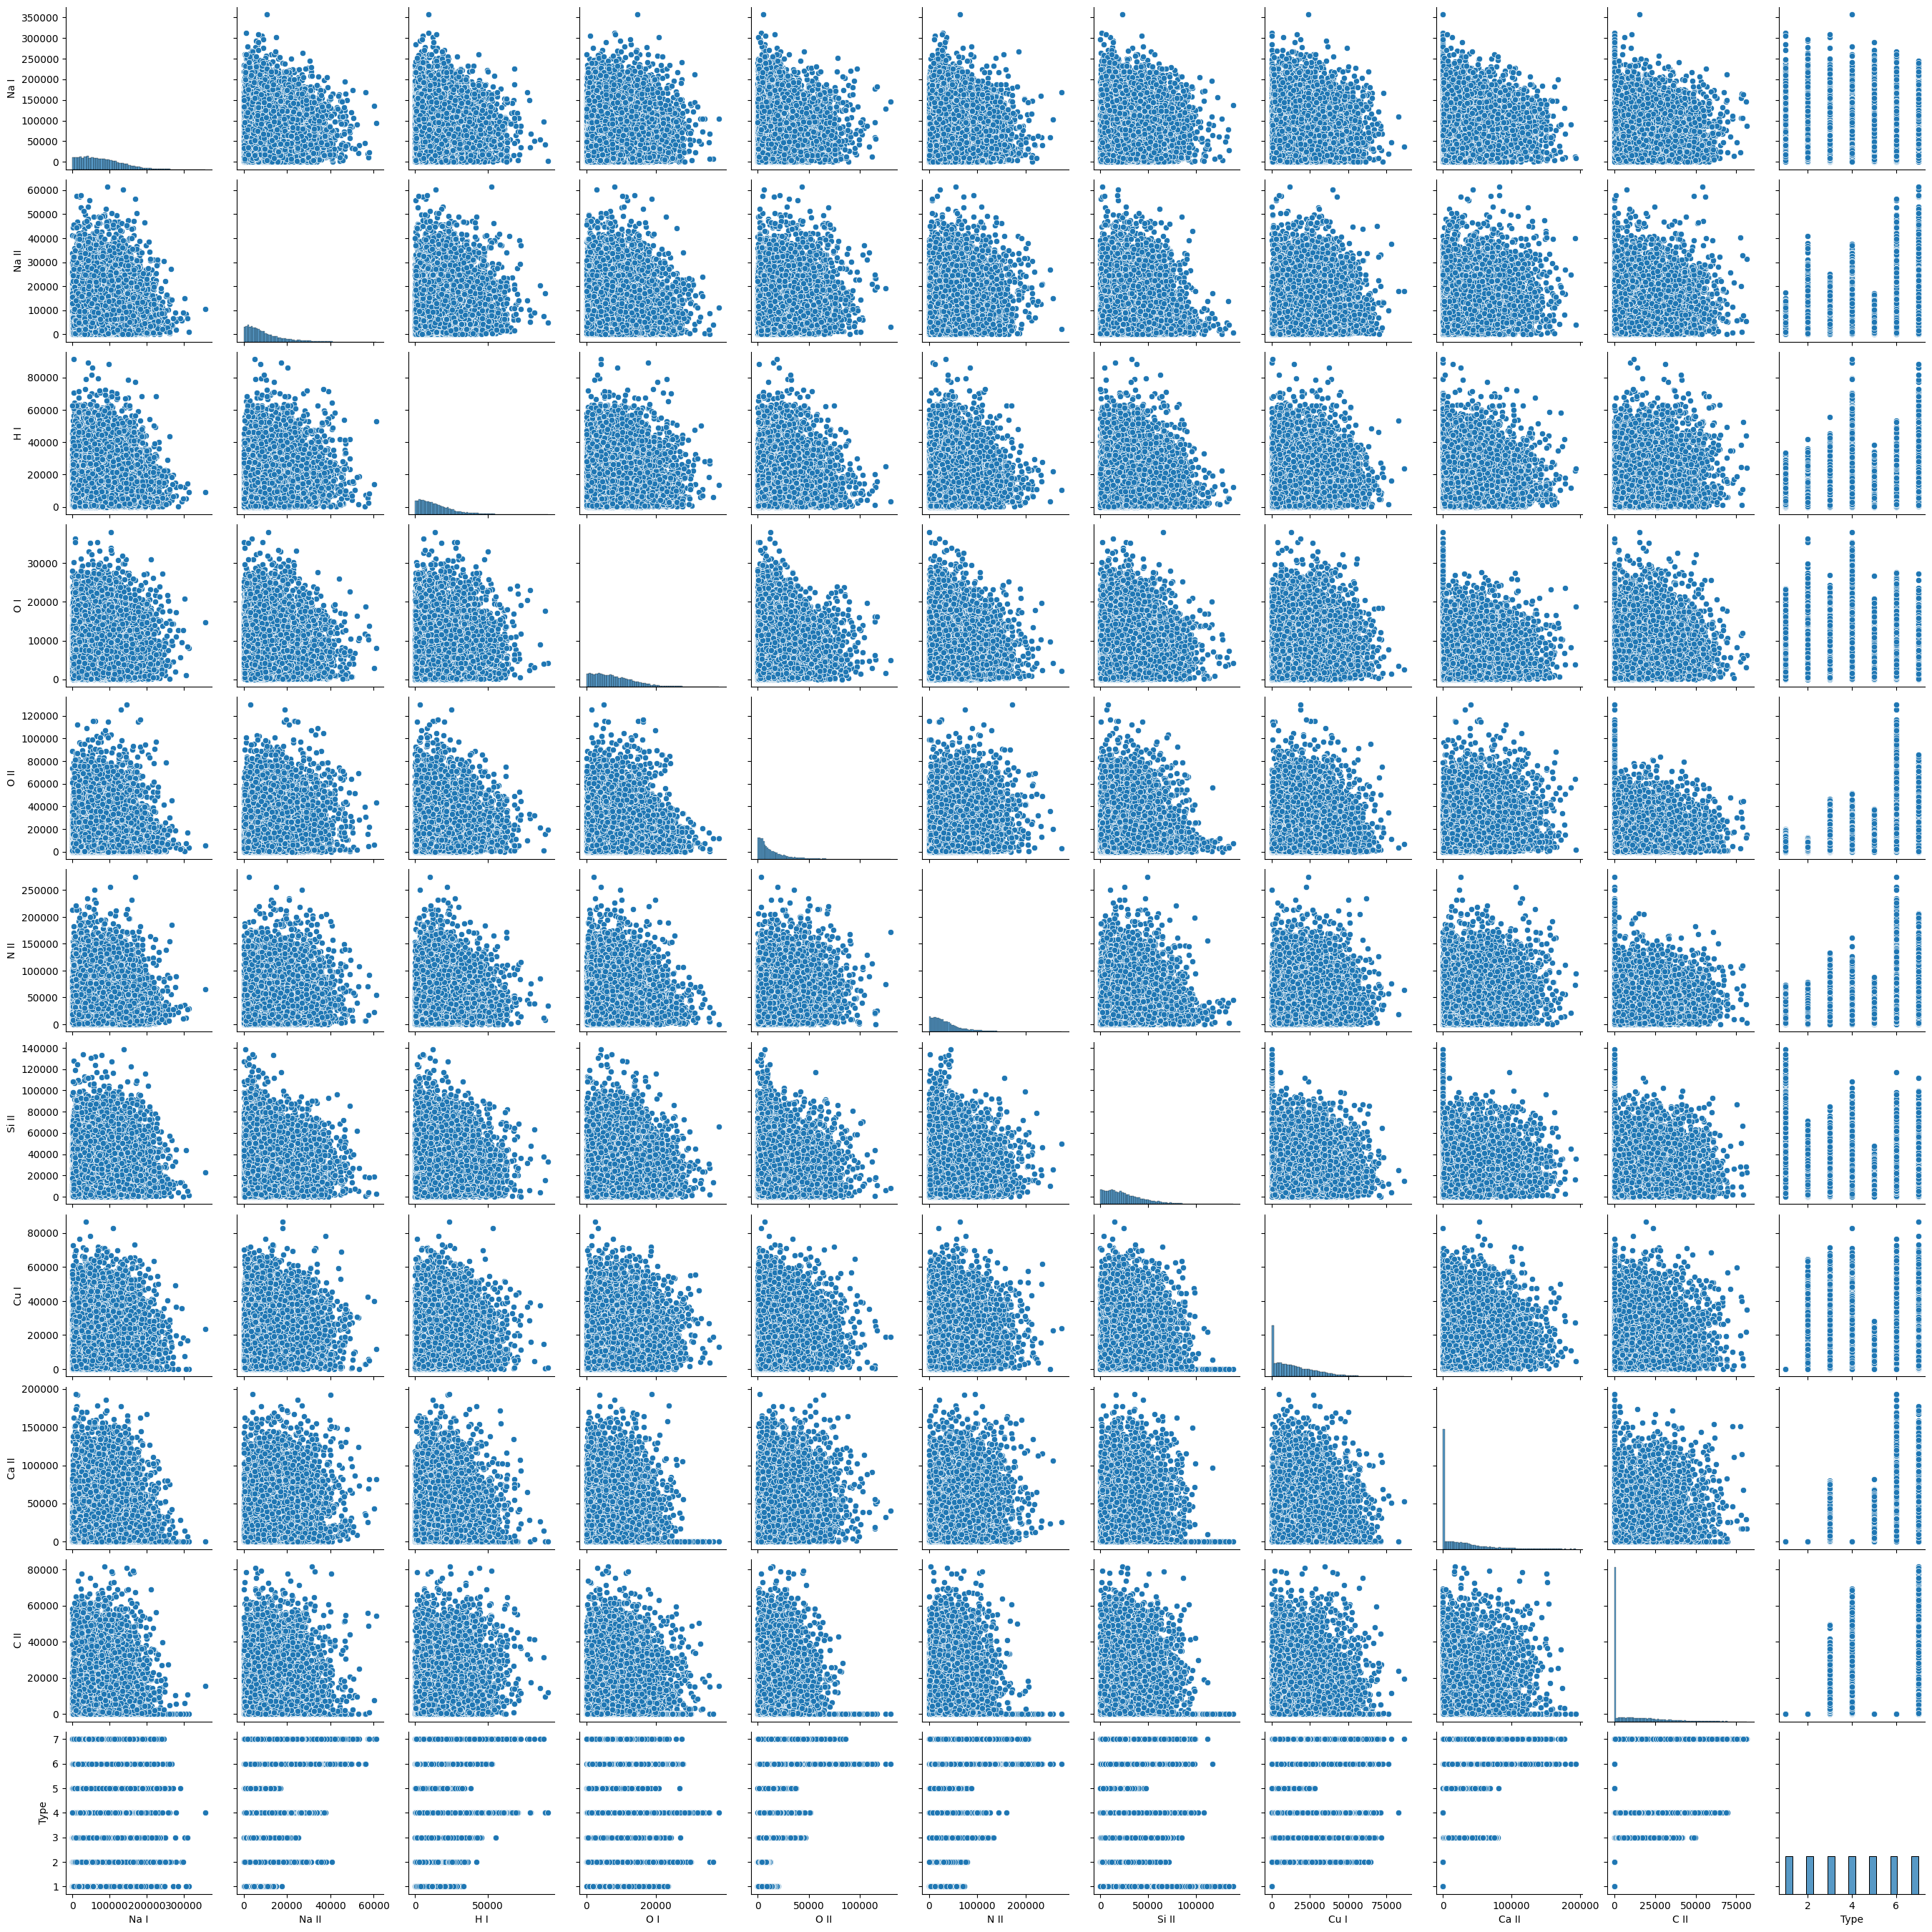

In [3]:
sns.pairplot(df)

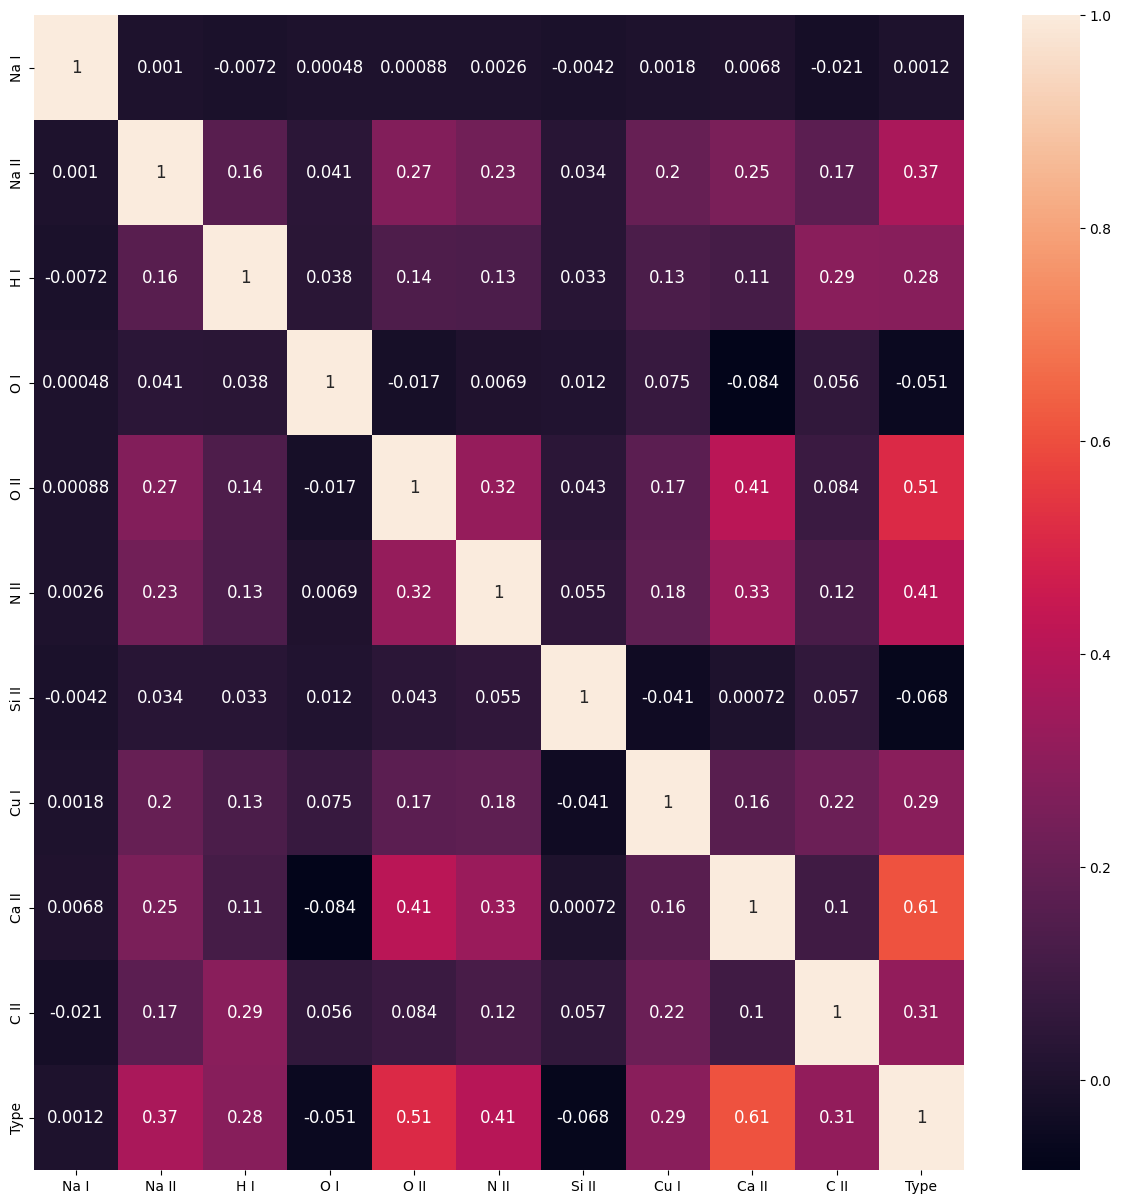

In [4]:
correlation = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, annot_kws={"size": 12})
plt.show()

In [5]:
# Set X as feature elements (Column 1-10)
X = df.iloc[:,0:10].values
# Set y as target column (Column 11)
y = df.iloc[:,-1].values

In [6]:
# Use stratified test split for the train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Machine Learning Model**

Error Model Analysis dilakukan menggunakan Confusion Matrix untuk Multiclass Classification. Metrics lain dari library Scikit Learn seperti Accuracy Score, Precision Score, Recall Score, dan F1-Score.

#### Accuracy Score
Skor akurasi klasifikasi multikelas adalah metrik yang digunakan untuk mengevaluasi kinerja model klasifikasi multikelas. Hal ini didefinisikan sebagai jumlah prediksi yang benar dibagi dengan jumlah total prediksi yang dibuat. Ini dihitung menggunakan rumus:

\begin{equation}
\text{Accuracy} = \frac{1}{N}\sum_{i=1}^{N}\mathbb{I}(y_i = \hat{y}_i)
\end{equation}

dimana:

- $N$: Jumlah total prediksi yang dibuat.
- $y_i$: Label sebenarnya dari sampel ke-i.
- $\hat{y}_i$: Label prediksi dari sampel ke-i.
- $\mathbb{I}(y_i = \hat{y}_i)$: Fungsi indikator yang sama dengan 1 jika $y_i = \hat{y}_i$ dan 0 jika tidak.

Rumus ini menghitung akurasi dengan menghitung jumlah prediksi yang benar (ditunjukkan oleh fungsi indikator) dan membaginya dengan jumlah total prediksi.

Nilai akurasi berkisar antara 0 hingga 1, di mana 1 menunjukkan pengklasifikasi sempurna yang tidak pernah membuat kesalahan, dan 0 menunjukkan pengklasifikasi yang selalu membuat kesalahan. Nilai akurasi yang lebih tinggi menunjukkan kinerja model yang lebih baik.

#### Precision Score
Presisi untuk kelas \(c\) diberikan oleh:

\begin{equation}
\text{Presisi}_c = \frac{\text{Positif Benar}_c}{\text{Positif Benar}_c + \text{Positif Salah}_c}
\end{equation}

di mana:
\begin{align*}
\text{Positif Benar}_c & : \text{Jumlah instans yang diprediksi benar untuk kelas } c \\
\text{Positif Salah}_c & : \text{Jumlah instans yang diprediksi salah untuk kelas } c
\end{align*}

Rata-rata bobot presisi secara keseluruhan untuk semua kelas dihitung sebagai berikut:

\begin{equation}
\text{Rata-rata Bobot Presisi} = \frac{\sum_{c=1}^{N} \text{Presisi}_c \times \text{Jumlah Instance}_c}{\sum_{c=1}^{N} \text{Jumlah Instance}_c}
\end{equation}

di mana:
$(\text{Jumlah Instance}_c)$ adalah jumlah instans untuk kelas \(c\), dan \(N\) adalah total jumlah kelas.

#### Recall Score
Recall untuk kelas \(c\) diberikan oleh:

\begin{equation}
\text{Recall}_c = \frac{\text{Positif Benar}_c}{\text{Positif Benar}_c + \text{Negatif Salah}_c}
\end{equation}

di mana:
\begin{align*}
\text{Positif Benar}_c & : \text{Jumlah instans yang diprediksi benar untuk kelas } c \\
\text{Negatif Salah}_c & : \text{Jumlah instans kelas } c \text{ yang diprediksi sebagai kelas lain}
\end{align*}

Rata-rata bobot recall secara keseluruhan untuk semua kelas dihitung sebagai berikut:

\begin{equation}
\text{Rata-rata Bobot Recall} = \frac{\sum_{c=1}^{N} \text{Recall}_c \times \text{Jumlah Instance}_c}{\sum_{c=1}^{N} \text{Jumlah Instance}_c}
\end{equation}

di mana:
$(\text{Jumlah Instance}_c)$ adalah jumlah instans untuk kelas \(c\), dan \(N\) adalah total jumlah kelas.

#### F1-Score
Skor F1 untuk kelas \(c\) diberikan oleh:

\begin{equation}
\text{Skor F1}_c = \frac{2 \times \text{Presisi}_c \times \text{Recall}_c}{\text{Presisi}_c + \text{Recall}_c}
\end{equation}

di mana \(\text{Presisi}_c\) dan \(\text{Recall}_c\) adalah presisi dan recall untuk kelas \(c\) seperti yang didefinisikan sebelumnya.

Rata-rata bobot skor F1 secara keseluruhan untuk semua kelas dihitung sebagai berikut:

\begin{equation}
\text{Rata-rata Bobot Skor F1} = \frac{\sum_{c=1}^{N} \text{Skor F1}_c \times \text{Jumlah Instans}_c}{\sum_{c=1}^{N} \text{Jumlah Instans}_c}
\end{equation}

di mana:
$(\text{Jumlah Instans}_c)$ adalah jumlah instans untuk kelas \(c\), dan \(N\) adalah total jumlah kelas.



## Linear Discriminant Analysis (LDA) Classification

(1) Langkah pertama adalah menghitung $\textbf{Mean}$
<br>
<br>
Menghitung mean vektor-vektor pada setiap komponen/kelas menggunakan $X_{train}$ dengan cara
\begin{equation}
m_i = \frac{1}{n_i} \displaystyle \sum_{i=1}^{n_i}
\frac{1}{n}
\end{equation}

<br>
(2) Langkah kedua adalah mencari scatter matrices

$\textbf{Within-class scatter matrix } S_W$

$$
S_W = \sum_{i=1}^{c} S_i
$$

Dimana $S_i$ adalah \textit{scatter matrices} untuk kelas spesifik

$$
S_i = \sum_{x \in D_i}^n (x - m_i)(x - m_i)^T
$$

Dimana $m_i$ adalah mean pada langkah pertama (1).

Secara alternatif, matriks kovarians kelas dapat digunakan untuk menambahkan faktor scaling $\frac{1}{N-1}$ ke matriks \textit{within-class scatter}

$$
\Sigma_i = \frac{1}{N_{i}-1} \sum_{x \in D_i}^n (x - m_i)(x - m_i)^T
$$

$$
S_W = \sum_{i=1}^{c} (N_{i}-1) \Sigma_i
$$

$\textbf{Between-class scatter matrix } S_B$

$$S_B =  \sum_{i=1}^{c} N_{i} (m_i - m) (m_i - m)^T$$

Dimana $m$ adalah mean secara keseluruhan, $m_i$ adalah mean dari satu kelas, dan $N_i$ adalah ukuran sampel pada kelas tersebut.
<br>
<br>

(3) Langkah ketiga adalah menghitung $\textbf{linear discriminant}$

$\textbf{Nilai eigen dan Vektor nilai eigen}$

Dimana sebuah matriks $A$ yang berisi $S_{W}^{-1}S_B$ untuk dicari nilai eigen nya terlebih dahulu dengan cara

$$det|A-\lambda I|$$

Setelah mendapatkan $\lambda$, dicari eigen vectornya dan kemudian eigen vektor yang dipilih menjadi dimensi baru dari linear discriminant.
<br>
<br>
(3) Langkah terakhir adalah $\textbf{Transformasi}$
<br>
<br>
Setelah memilih eigenvector sebanyak $k$, komponen tersebut dapat digunakan untuk mengtransform matriks $n$ awal ke subspace yang baru dengan persamaan berikut:

$$Y = X \times W$$

### Model Probabilistik
Dalam penggunaan LDA menggunakan sklearn, digunakan model probabilistik dimana terjadi pemodelan pada kelas dengan distribusi kondisional dari data untuk setiap kelas $P(X|y=k)$.

Menyesuaikan dengan jurnal yang dipilih, prediksi dari pemodelan tersebut dapat diperoleh menggunakan aturan Bayes untuk setiap sampel training $x\in R^d$

$$P(y=k|x)=\frac{P(x|y=k).P(y=k)}{\sum_{l=1}^{K} P(x|y=l).P(y=l)}$$

Dimana $k$ adalah kelas yang memaksimumkan persamaan probabilitas. Untuk menggunakan LDA, $P(x|y)$ dimodelkan sebagai distribusi multivariatif gaussian dengan densitas menjadi sebagai berikut.

$$P(x|y = k) = \frac{1}{(2\pi)^\frac{d}{2} |\sum_{k}|^\frac{1}{2}} exp(- \frac{1}{2}(x-μ_k)^t \sum_k^{-1}(x-μ_k)) $$

dimana $d$ adalah jumlah fitur

Karena menggunakan Gaussian pada LDA, digunakan log posterior. Gaussian log posterior pada setiap keas akan dijumlahkan ke matriks kovarians $\sum_k = \sum$ untuk semua $k$. Sehingga log posterior dari LDA adalah sebagai berikut.

$$ log\space P(y=k|x) = -\frac{1}{2}(x-\mu_k)^t \sum^{-1}(x-\mu_k) + log\space P(y=k) + C_{st}  $$

Pada bagian $(x-\mu_k)^t \sum^{-1}$ korespons dengan Mahalanobis Distance antara samplel $x$ dan mean $\mu_k$. Distance tersebut memberikan informasi seberapa dekat $x$ dari $\mu_k$ dan menghitung varians pada setiap fitur. Sehingga, LDA dapat diinterpretasi dengan memasukkan $x$ jepada kelas dimana meannya paling dekat (yang dilihat menggunakan distance mahalanobis).

Sehingga, log-posterior LDA dapat ditulis ulang sebagai

$$ log\space P(y=k|x) = \omega_k^t x + \omega_{k0} + C_{st}  $$

Dimana $\omega_k = \sum^-1 \mu_k$ dan
 $\omega_{k0} = -\frac{1}{2}\mu_k^t \sum^{-1}\mu_k \space+logP(y = k) $

### Optimasi LDA

Dalam jurnal, penggunaan optimasi tidak ditemukan untuk mengoptimasi nilai $\omega_k^t$ dan $\omega_k0$, hanya saja terdapat optimasi LDA yang dapat dilakukan dengan model matematika berikut dari model matematisnya.

$$\hat{\omega} = \arg \max_{\omega} \frac{\omega^T S_b \omega}{\omega^T S_b \omega} $$


### Pseudocode
1. **Input: Data Pelatihan (`X_train`, `y_train`), Data Uji (`X_test`)**

2. **Preprocessing:**
<br>
   a. Untuk setiap kelas `c`:
      - Hitung rata-rata (`mean_c`) dan deviasi standar (`std_c`) dari setiap fitur di kelas `c`.
      - Hitung prior probability untuk setiap kelas (`prior_c`).

3. **Klasifikasi:**
<br>
   a. Inisialisasi variabel untuk hasil klasifikasi (`predictions`).
   <br>
   b. Hitung matriks dalam kelas (within-class scatter matrix) dan matriks antar kelas (between-class scatter matrix) menggunakan solver SVD.
   <br>
   c. Hitung matriks eigen (eigenvalues dan eigenvectors) dari matriks invers dari matriks dalam kelas dikalikan dengan matriks antar kelas menggunakan solver SVD.
   <br>
   d. Pilih komponen utama (dimensi) yang diinginkan dari eigenvectors.
   <br>
   e. Transformasi data pelatihan dan data uji ke ruang fitur baru menggunakan komponen utama.
   <br>
   f. Inisialisasi variabel untuk menyimpan hasil prediksi (`predictions`).
   <br>
   g. Untuk setiap sampel uji:
   <br>
   <br>
      - Hitung likelihood (probabilitas distribusi Gaussian) untuk setiap kelas menggunakan rumus distribusi Gaussian di ruang fitur baru.
      - Pilih kelas dengan posterior probability terbesar sebagai prediksi untuk sampel tersebut.
      - Tambahkan prediksi ke `predictions`.

4. **Evaluasi Model:**
   a. Hitung akurasi, presisi, recall, F1-score, dan metrik evaluasi lainnya menggunakan `predictions` dan label kelas yang sebenarnya.

5. **Output: Hasil Klasifikasi dan Evaluasi Model.**

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Inisialisasi model LDA
lda = LDA(
    solver='eigen', 
    tol=1e-4, 
    shrinkage='auto', 
    n_components=None, 
    priors=None
)

# Fitting model ke dataset
lda.fit(X_train, y_train)


y_pred = lda.predict(X_test)

accuracy_LDA = accuracy_score(y_test, y_pred)*100
precision_LDA = precision_score(y_test, y_pred, average='weighted')*100
recall_LDA = recall_score(y_test, y_pred, average='weighted')*100
f1_LDA = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_LDA}","%")
print(f"Precision: {precision_LDA}","%")
print(f"Recall: {recall_LDA}","%")
print(f"F1: {f1_LDA}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 73.89285714285714 %
Precision: 75.51999939664864 %
Recall: 73.89285714285714 %
F1: 73.72754761810121 %


1           2           3           4           5  \
precision    0.769608    0.720621    0.686567    0.762943    0.623960   
recall       0.771499    0.816583    0.572139    0.707071    0.897129   
f1-score     0.770552    0.765607    0.624152    0.733945    0.736016   
support    407.000000  398.000000  402.000000  396.000000  418.000000   

                    6           7  accuracy    macro avg  weighted avg  
precision    0.803665    0.929688  0.738929     0.756722      0.755200  
recall       0.795337    0.605598  0.738929     0.737908      0.738929  
f1-score     0.799479    0.733436  0.738929     0.737598      0.737275  
support    386.000000  393.000000  0.738929  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

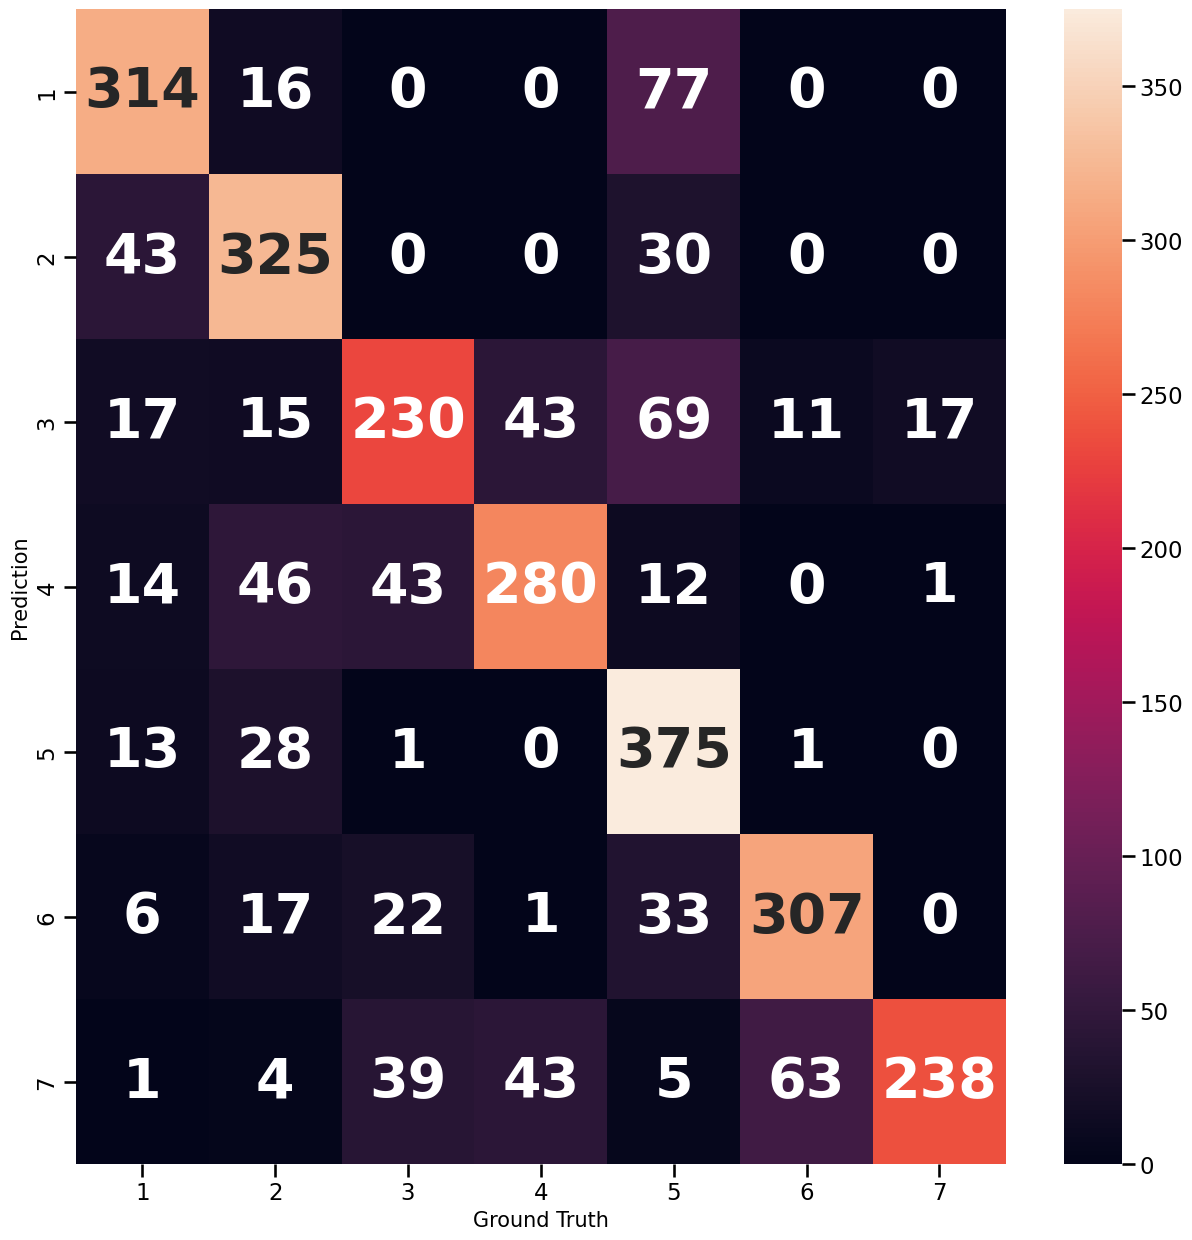

In [8]:
sns.set_context('talk')
cm_DTM = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm_DTM, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## Decision Tree Classification

### Gambaran Umum Algoritma


Secara umum, metode decision tree dapat dibagi menjadi tahap-tahap berikut.


1.   Memilih *Attribute* terbaik dengan *Attribute Selection Measures (ASM)*
2.   Membuat *Attribute* tersebut. menjadi sebuah *decision node* dan memecah dataset menjadi subset-subset yang lebih kecil.
3. Memulai pembuatan "Tree" dengan cara mengulang proses secara rekursif untuk setiap kategori hingga salah satu dari kondisi berikut terpenuhi: Semua tuple merujuk pada nilai *Attribute* yang sama, tidak ada *Attribute* yang tersisa, atau tidak ada lagi *Instance* yang tersisa.

### *Pseudocode*
**Inisialisasi**:
*   Ambil dataset yang berisi fitur dan label kelas.
*   Pisahkan dataset menjadi data pelatihan (X_train, y_train) dan data pengujian (X_test, y_test), jika diperlukan.

**Pembangunan *Decision Tree*:**


*   Tentukan kriteria pemilihan fitur (mis. Entropy, Information Gain, Gini Impurity, dll.).
*   Buat fungsi untuk membangun *decision tree* dengan menggunakan algoritma seperti ID3, CART, atau algoritma lainnya.
*   Latih model *decision tree* pada data pelatihan (X_train, y_train).

**Prediksi:**


*   Untuk setiap sampel pada data pengujian (X_test):
a. Mulai dari akar pohon.
b. Berdasarkan fitur saat ini, navigasi ke cabang yang sesuai dalam pohon.
c. Ulangi langkah b hingga mencapai daun, yang akan mewakili prediksi kelas untuk sampel tersebut.
d. Simpan prediksi kelas untuk setiap sampel dari X_test.

**Evaluasi:**
*   Bandingkan prediksi yang diperoleh dari *decision tree* dengan label asli dari data pengujian (y_test).
*   Hitung metrik evaluasi seperti akurasi, presisi, recall, dan F1-score untuk menilai kinerja model.

### Algoritma ID3

*   Dimulai dengan set awal S sebagai *Root Node*.
*   Pada setiap iterasi, algoritma akan beriterasi melalui *attribute* yang belum digunakan dari set S dan menghitung ***Entropy(H)*** dan ***Information Gain(IG)*** dari *attribute* tersebut.
*   Algoritma kemudian akan memilih *attribute* yang memiliki *entropy* terkercil atau *information gain* terbesar.
*   Set S kemudian akan dipisah atau *split* oleh *attribute* yang terpilih untuk menghasilkan subset dari data.
*   Algoritma akan merekursi pada setiap subet, dengan hanya mempertimbangkan *attribute* yang belum pernah digunakan sebelumnya.

## *Attribute Selection Measures* (ASM)
ASM adalah metode heuristik untuk memilih *splitting criterion* yang mempartisi data dengan cara yang terbaik. ASM yang paling sering digunakan yaitu adalah *Entropy* *Information Gain*, *Gain Ratio*, dan *Gini Index*. Pada konteks jurnal acuan, ASM yang digunakan adalah *Entropy*

### *Entropy*
Entropi adalah keacakan atau impuritas pada sebuah sistem, dalam konteks teori informasi, Entropi mengacu pada impuritas dari sekelompok contoh atau data. Semakin tinggi entropi, maka semakin sulit pula untuk menarik konklusi dari informasi yang diberikan. Contoh pemberian informasi yang acak yaitu adalah membolak-balik sebuah koin.
<br/>
<br/>
Secara matematis, entropi untuk satu *attribute* adalah sebagai berikut:
<br/>
<br/>
$$E(S)=\sum_{i=1}^{c}-\pi\log_2(\pi)$$
<br/>
<br/>

Dengan $S$ sebagai Kondisi Saat Ini, dan $\pi$ adalah probabilitas dari *event i* dari kondisi $S$, atau persentase kelas $i$ dalam sebuah node dari kondisi $S$

Sedangkan entropi untuk lebih dari satu *attribute* adalah sebagai berikut:

$$
E(T,X)=\sum_{c \in X}P(c)E(c)
$$

Dengan $T$ sebagai kondisi saat ini dan $X$ sebagai *attribute* yang dipilih.


### *Information Gain*
*Information Gain* adalah penurunan dari entropi, yang menghitungh perbedaan antara entropi sebelum pemecahan data dengan entropi rata-rata setelah pemecahan data. Dalam kata lain, *information gain* mengukur seberapa baik sebuah *attribute* dalam memisahkan data *training* relatif terhadap target klasifikasinya.
<br/>
<br/>
$$Information Gain = Entropy(before)-\sum_{j=1}^{K}Entropy(j, after)$$
<br/>
<br/>

Dengan "before" adalah dataset sebelum *split* atau pemisahan, dan $K$ adalah julah subset yang dihasilkan dari proses *split* tersebut. Sedangkan $(j, after)$ adalah subset $j$ setelah proses *splitting*.

### Optimasi *Decision Tree*
Secara umum, pada metode *Decision Tree* baik *Entropy* maupun *Information Gain* digunakan secara bersamaan. Dan pada metode ini tidak digunakan *loss/cost function* seperti yang umumnya digunakan pada metode-metode lainnya.


In [9]:
from sklearn.tree import DecisionTreeClassifier

# define the model
model = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=2,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_DTM = accuracy_score(y_test, y_pred)*100
precision_DTM = precision_score(y_test, y_pred, average='weighted')*100
recall_DTM = recall_score(y_test, y_pred, average='weighted')*100
f1_DTM = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_DTM}","%")
print(f"Precision: {precision_DTM}","%")
print(f"Recall: {recall_DTM}","%")
print(f"F1: {f1_DTM}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 93.42857142857143 %
Precision: 93.42841313369713 %
Recall: 93.42857142857143 %
F1: 93.42841320847634 %


1      2           3      4           5           6  \
precision    1.0    1.0    0.823821    1.0    0.947494    0.945455   
recall       1.0    1.0    0.825871    1.0    0.949761    0.943005   
f1-score     1.0    1.0    0.824845    1.0    0.948626    0.944228   
support    407.0  398.0  402.000000  396.0  418.000000  386.000000   

                    7  accuracy    macro avg  weighted avg  
precision    0.821429  0.934286     0.934028      0.934284  
recall       0.819338  0.934286     0.933996      0.934286  
f1-score     0.820382  0.934286     0.934012      0.934284  
support    393.000000  0.934286  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

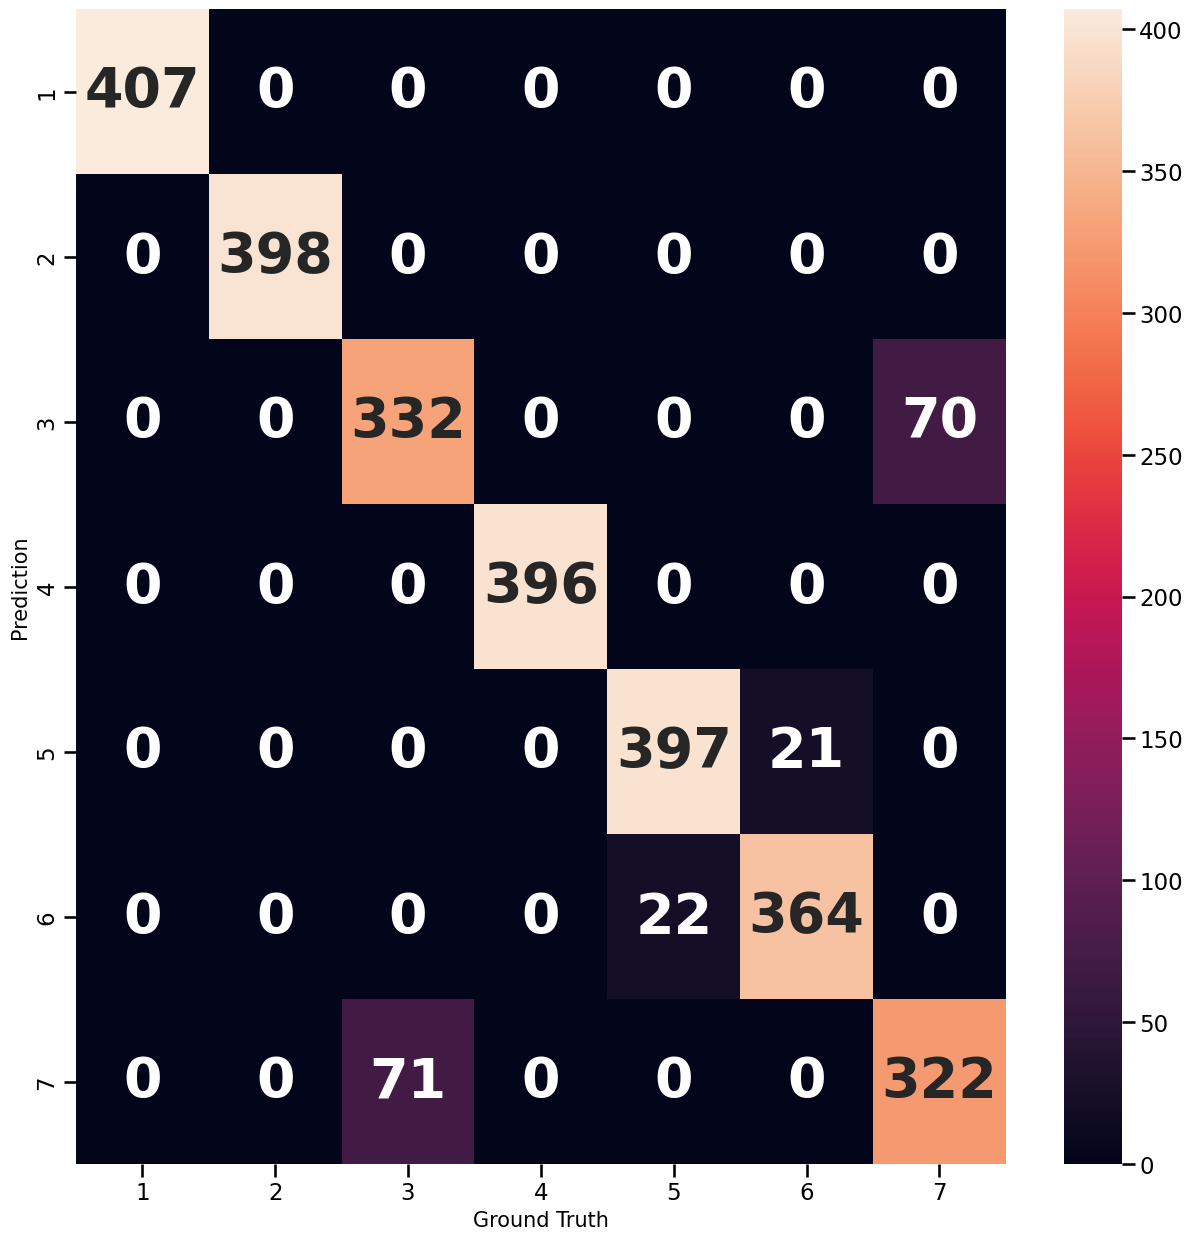

In [10]:
sns.set_context('talk')
cm_DTM = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm_DTM, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## K-Nearest Neighbors (KNN) Classification

Cara Menghitung menggunakan KNN :
1. Menentukan jumlah tetangga  $k$ untuk membuat prediksi
2. Menentukan fungsi jarak

 $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$,

Misalkan data tes adalah  $x_q$ dan data lainnya  $(x_i, y_i)$  

Cara menghitung hasil prediksi kelas  $x_q$ dengan cara menghitung Jarak $x_i$ and $x_q$
*   Euclidean Distance Formula
\begin{equation}
d = \sqrt{{(x_2 - x_1)^2 + (y_2 - y_1)^2}}
\end{equation}
3. Menyiapkan data latih untuk melatih model
4. Menghitung jarak antara data uji dengan data latih pada setiap data uji yang diprediksi
5. Memilih k tetangga terdekat berdasarkan nilai jarak yang telah dihitung sebelumnya
6. Menentukan kelas mayoritas dengan menghitung frekuensi masing-masing kelas dan memilih kelas dengan frekuensi tertinggi

### Pseudocode

1. **Inisialisasi :**
*   Mengambil dataset yang terdiri dari fitur dan label kelas
*   Memisahkan dataset menjadi data latih (X_train, y_train)dan data uji (X_tes, y_tes)

2. **Fungsi Euclidean Distance:**
*   Menginisiasi model dengan KNeighborsClassifier()
*   Menghitung jarak antara dua titik dengan **Euclidean Distance Formula**
*   Melatih model decision dengan data latih  (X_train, y_train)

3. **Evaluasi model:**

Untuk setiap data uji, prediksi kelas dengan model_KNN.predict(X_test_KNN)

4. **Mengukur performa model:**
*   Menghitung akurasi dengan cara accuracy_score(y_test_KNN, y_pred_KNN)*100
*   Menghitung presisi dengan cara precision_score(y_test_KNN, y_pred_KNN, average='weighted')*100
*   Menghitung recall dengan cara recall_score(y_test_KNN, y_pred_KNN, average='weighted')*100
*   Menghitung f1 dengan cara f1_score(y_test_KNN, y_pred_KNN, average='weighted')*100

Selanjutnya menampilkan semua hasil perhitungan

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier(
    weights='distance',
    metric='euclidean'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred)*100
precision_KNN = precision_score(y_test, y_pred, average='weighted')*100
recall_KNN = recall_score(y_test, y_pred, average='weighted')*100
f1_KNN = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_KNN}","%")
print(f"Precision: {precision_KNN}","%")
print(f"Recall: {recall_KNN}","%")
print(f"F1: {f1_KNN}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 73.78571428571429 %
Precision: 74.06786708450632 %
Recall: 73.78571428571429 %
F1: 73.20107300962039 %


1           2           3           4           5  \
precision    0.753876    0.756381    0.619565    0.760000    0.722105   
recall       0.955774    0.819095    0.567164    0.719697    0.820574   
f1-score     0.842904    0.786490    0.592208    0.739300    0.768197   
support    407.000000  398.000000  402.000000  396.000000  418.000000   

                    6           7  accuracy    macro avg  weighted avg  
precision    0.747396    0.828685  0.737857     0.741144      0.740679  
recall       0.743523    0.529262  0.737857     0.736441      0.737857  
f1-score     0.745455    0.645963  0.737857     0.731502      0.732011  
support    386.000000  393.000000  0.737857  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

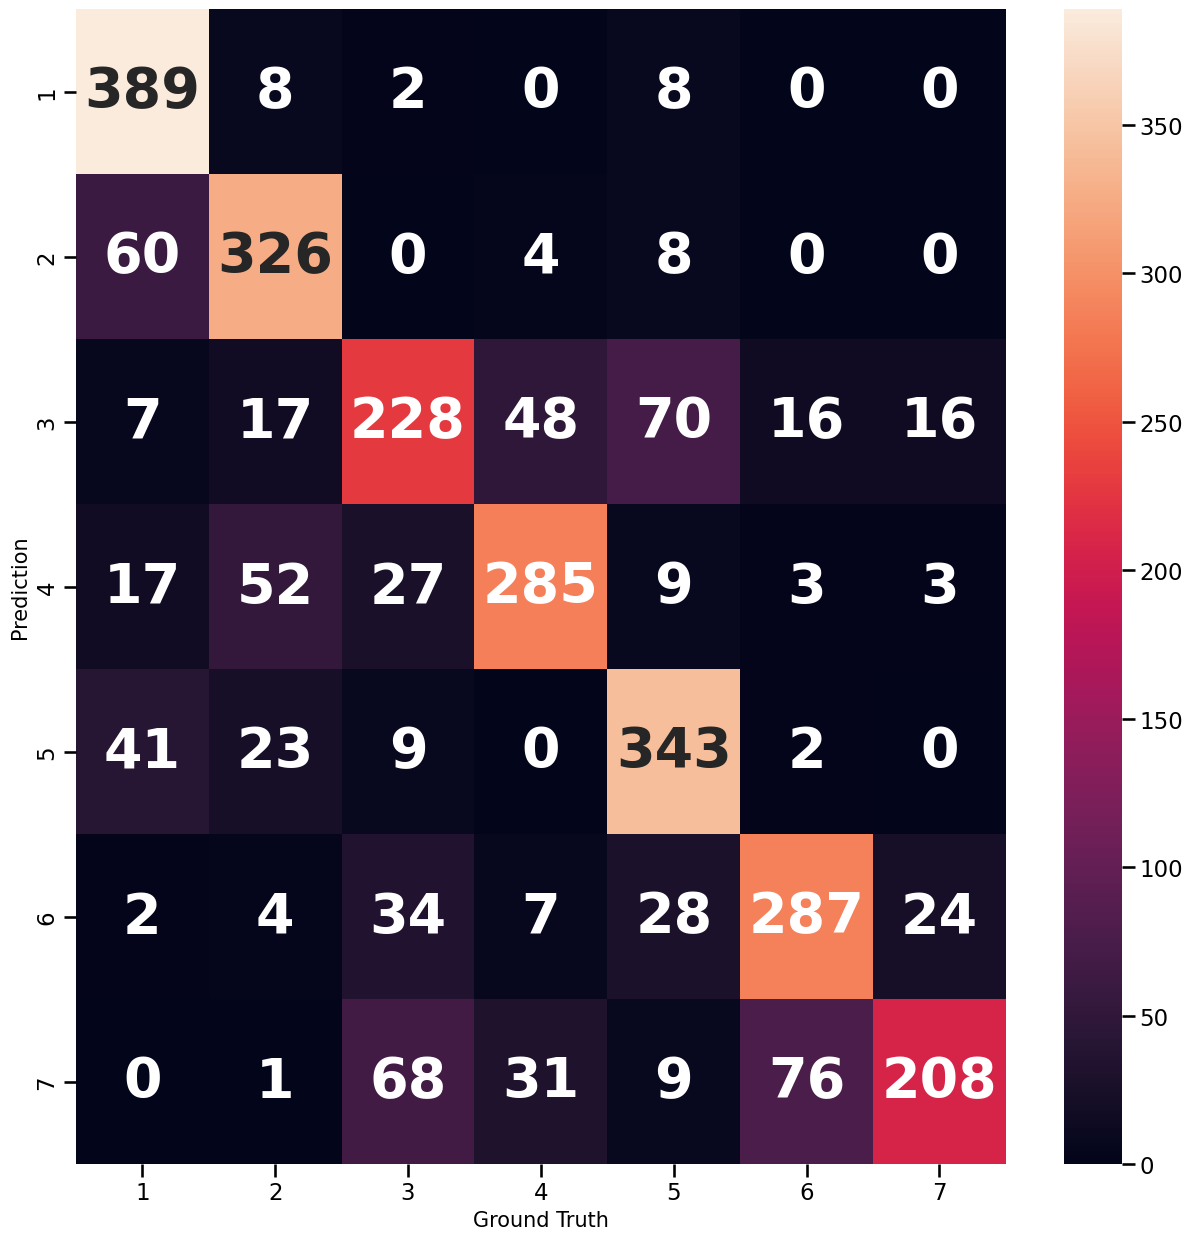

In [12]:
sns.set_context('talk')
cm_KNN = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm_KNN, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## Gradient Boosting Classification

Secara umum, metode Gradient Boosting dapat dibagi menjadi tahap-tahap berikut.

**Pertama**, kita perlu menginisiasi model dengan sebuah nilai konstan:

$$F_0(x)=\underset{\gamma}{\text{argmin}}\sum_{i=1}^{n}L(y_i, \gamma)$$

Pada tahap pertama ini, kita menciptakan prediksi nilai konstan awal $F_0$. $L$ adalah fungsi kerugian, yang dalam kasus ini adalah **Log Loss** atau yang lebih umum dikenal sebagai **Categorical Cross Entropy Loss**.

$$L=-\sum_{i=1}^{K}y_i \log(p_i)$$

Dengan $y_i$ adalah target klasifikasi, dan $p$ adalah hasil prediksi probabilitas dari kelas tersebut.

Untuk tahap-tahap berikutnya, diiterasikan dari $m = 1$ hingga $M$.

**Tahap Kedua**, pada tahap ini kita perlu mengkalkulasi residual:

$$\gamma_{im}=-\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{(m-1)}(x)}$$

Residual $\gamma_{im}$ didapatkan dengan menghitung turunan dari *fungsi kerugian* terhadap prediksi sebelumnya $F_{m-1}$ dan mengalikannya dengan $-1$.

**Tahap Ketiga**, kita perlu melatih *regression tree* dengan fitur $X$ terhadap $r$ dan membuat terminal node $R_{jm}$ untuk $j=1,...,J_m$. Dengan $j$ adalah terminal node, dan $m$ adalah indeks, dan $J$ kapital berarti jumlah total terminal node.

**Tahap Keempat**, adalah menghitung:

$$\gamma_{jm}=\underset{\gamma}{\text{argmin}}\sum_{x_i\in R_{jm}}L(y_i, F_{m-1}(x_i)+\gamma)$$

untuk $j=1,...,J_m$. Dengan $\gamma_{jm}$ adalah nilai yang meminimalkan *fungsi kerugian* pada setiap terminal node $j$. $\sum_{x_i\in R_{jm}}L$ berarti kita mengagregasikan kerugian pada semua $x_i$ yang termasuk dalam terminal node $R_{jm}$.

**Tahap Kelima**, yaitu memperbarui model:

$$F_m(x)=F_{m-1}(x)+v\sum_{j=1}^{J_m}\gamma_{jm}1(x\in R_{jm})$$

Pada langkah terakhir, kita memperbarui prediksi dari model gabungan $F_m$. Ketika sebuah $x$ tertentu berada pada terminal node $R_{jm}$, kita memilih nilai $\gamma_{jm}$. Karena setiap terminal node bersifat eksklusif, maka setiap $x$ hanya dapat berada di satu terminal node saja. Nilai $\gamma_{jm}$ yang sesuai kemudian ditambahkan ke prediksi sebelumnya $F_{m-1}$ sehingga menghasilkan prediksi yang baru $F_m$. $v$ adalah *learning rate* yang mengontrol seberapa besar kontribusi prediksi $\gamma$ terhadap prediksi gabungan $F_m$.

### *Pseudocode*
**Inisialisasi**:
*   Ambil dataset dengan fitur (X) dan label kelas (y).
*   Tentukan jumlah kelas (K) dan jumlah iterasi (M) untuk Gradient Boosting.
*   Inisialisasi model awal F(x) dengan nilai rata-rata untuk setiap kelas.

**Untuk setiap iterasi m dari 1 hingga M:**
*   Menghitung gradien untuk setiap sampel dan kelas: Gunakan fungsi kerugian Categorical Cross Entropy untuk menghitung gradien, Gradien ini menunjukkan seberapa besar kesalahan prediksi kita.
*   Latih model regresi (misalnya, *decision tree*) pada gradien yang dihitung: Tujuannya adalah untuk memprediksi kesalahan dari model sebelumnya.
*   Tentukan koefisien $\gamma$ yang meminimalkan *loss function*: Ini akan menentukan seberapa besar perbaikan yang harus kita lakukan pada model saat ini.
*   Perbarui model ensemble dengan rumus $F_m(x)=F_{m-1}(x)+v\sum_{j=1}^{J_m}\gamma_{jm}1(x\in R_{jm})$.

**Setelah semua iterasi selesai:**
*   Model $F_m(x)$ yang terakhir akan digunakan untuk membuat prediksi kelas untuk data baru.
*   Untuk klasifikasi multikelas, gunakan probabilitas dari setiap kelas untuk membuat prediksi akhir.


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
# define the model
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_GBM = accuracy_score(y_test, y_pred)*100
precision_GBM = precision_score(y_test, y_pred, average='weighted')*100
recall_GBM = recall_score(y_test, y_pred, average='weighted')*100
f1_GBM = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_GBM}","%")
print(f"Precision: {precision_GBM}","%")
print(f"Recall: {recall_GBM}","%")
print(f"F1: {f1_GBM}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 96.21428571428572 %
Precision: 96.25294776807554 %
Recall: 96.21428571428572 %
F1: 96.21057784147305 %


1           2           3           4           5           6  \
precision    1.0    0.997494    0.872642    1.000000    0.967213    0.986737   
recall       1.0    1.000000    0.920398    0.997475    0.988038    0.963731   
f1-score     1.0    0.998745    0.895884    0.998736    0.977515    0.975098   
support    407.0  398.000000  402.000000  396.000000  418.000000  386.000000   

                    7  accuracy    macro avg  weighted avg  
precision    0.913747  0.962143     0.962547      0.962529  
recall       0.862595  0.962143     0.961748      0.962143  
f1-score     0.887435  0.962143     0.961916      0.962106  
support    393.000000  0.962143  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

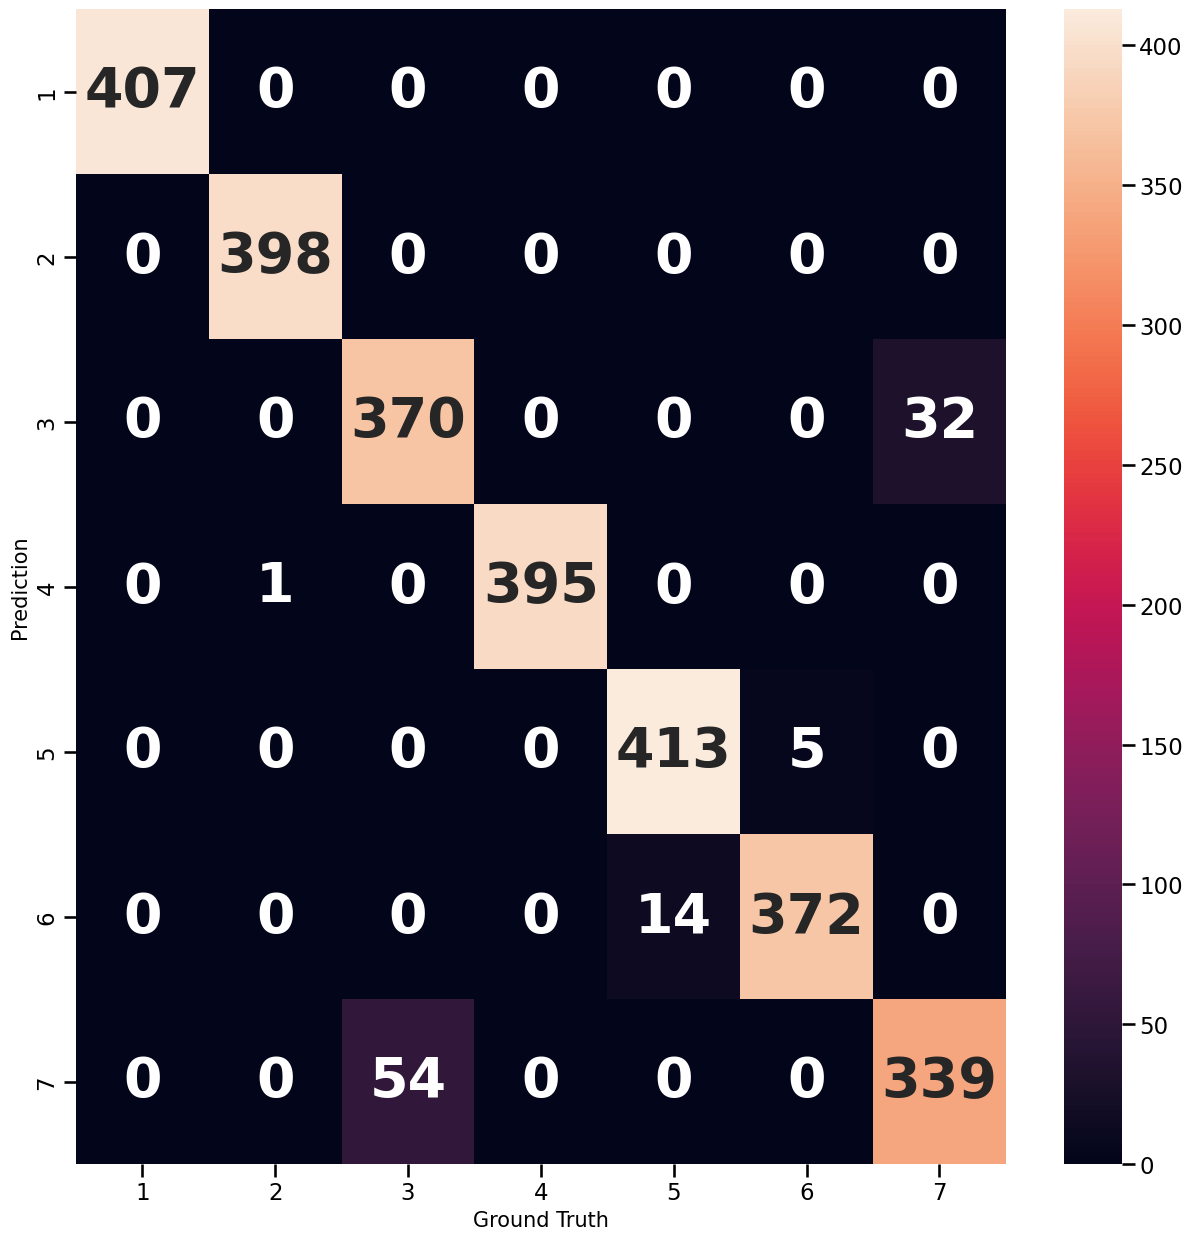

In [14]:
sns.set_context('talk')
cm_GBM = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm_GBM, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## Histogram Gradient Boosting Classification

### Cost/Loss Function

$ J(\hat{y}, y) = - \sum_{j=1}^{n} y_j \ln \hat{y}_j $

Dalam persamaan ini:

- $ J(\hat{y}, y)$ adalah cost function

- $\hat{y}$ adalah distribusi probabilitas yang diprediksi atas kelas-kelas (setiap elemen adalah probabilitas yang diprediksi untuk satu kelas)
y adalah label yang benar (vektor yang menunjukkan kelas yang benar)

- n adalah jumlah kelas



Metode Histogram Gradient Boosting untuk klasifikasi multikelas adalah teknik pembelajaran ensembel yang membangun pohon keputusan secara berurutan. Metode ini mengoptimalkan fungsi biaya dengan menambahkan pembelajar (pohon) yang lemah dengan cara meningkatkan. Algoritme ini melibatkan pembuatan histogram dari gradien untuk membuat keputusan yang terpisah, meningkatkan efisiensi dan skalabilitas komputasi.

### Rumus/Algoritma Pengoptimalan
Peningkatan gradien mengoptimalkan fungsi objektif (log-likelihood negatif untuk deviasi multinomial) dengan secara iteratif menyesuaikan pelajar yang lemah dengan gradien negatif dari fungsi kerugian. Langkah pengoptimalan melibatkan pencarian parameter optimal untuk setiap pembelajar yang lemah untuk meminimalkan kerugian.

\begin{align*}
\text{Inisialisasi model:} \quad & F_0(x) = \arg\min_c \sum_{i=1}^{N} L(y_i, c) \\
\text{Untuk } m = 1 \text{ ke } M: \quad & \\
& \text{Menghitung gradien negatif: } -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)} \\
& \text{Sesuaikan weak learner berbasis histogram dengan gradien negatif:} \\
& \quad \text{Untuk setiap leaf } j \text{ di setiap pohon:} \\
& \quad \quad \text{ Hitung nilai optimal } \gamma_{jm} \text{ untuk meminimalkan kerugian:} \\
& \quad \quad \quad \gamma_{jm} = \frac{\sum_{i \in \text{leaf } j} -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i))}\right]_{F(x)=F_{m-1}(x)}}{\sum_{i \in \text{leaf } j} h(x_i)} \\
& \text{Perbarui model:} \quad F_m(x) = F_{m-1}(x) + \eta \sum_{j=1}^{J} \gamma_{jm} \quad (x \in \text{leaf } j) \\
\end{align*}

Di sini, $L$ adalah loss function, $F(x)$ adalah model saat ini, $J$ adalah jumlah leaf di setiap tree, dan $\eta$ adalah learning rate.

## Pseudocode

### Inisialisasi
- Inisialisasi dataset: $(D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\})$ di mana \(N\) adalah jumlah sampel.
- Tetapkan jumlah kelas: \(C\).
- Inisialisasi parameter: $(\text{learning\_rate} (\eta), \text{num\_trees} (K), \text{max\_depth}, \text{subsample}, \text{colsample\_bytree}, \text{histogram\_bins}, \text{objective\_function})$, dll.

### Loop Pelatihan
- Untuk \(k = 1\) hingga \(K\):
  - Hitung gradien negatif: $(\nabla_{\theta} \text{Loss})$ untuk setiap kelas.
  - Bangun histogram untuk perhitungan yang efisien.
  - Perbarui nilai daun berdasarkan gradien negatif dan histogram.
  - Terapkan regularisasi jika ditentukan (misalnya, regularisasi L1 atau L2).
  - Perbarui struktur pohon dengan membagi daun.
  - Potong pohon untuk menghindari overfitting.
  - Perbarui bobot untuk setiap daun berdasarkan struktur baru.
  - Hitung kerugian pelatihan untuk pemantauan.

### Prediksi
- Untuk sampel baru \(x\):
  - Lewati \(x\) melalui semua pohon untuk mendapatkan skor kelas.
  - Prediksi kelas dengan skor tertinggi.

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier

# define the model
model = HistGradientBoostingClassifier(
    loss='log_loss',
    max_bins=250
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_HGB = accuracy_score(y_test, y_pred)*100
precision_HGB = precision_score(y_test, y_pred, average='weighted')*100
recall_HGB = recall_score(y_test, y_pred, average='weighted')*100
f1_HGB = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_HGB}","%")
print(f"Precision: {precision_HGB}","%")
print(f"Recall: {recall_HGB}","%")
print(f"F1: {f1_HGB}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 96.03571428571429 %
Precision: 96.07040991606175 %
Recall: 96.03571428571429 %
F1: 96.03239004737294 %


1      2           3      4           5           6  \
precision    1.0    1.0    0.869359    1.0    0.962791    0.989305   
recall       1.0    1.0    0.910448    1.0    0.990431    0.958549   
f1-score     1.0    1.0    0.889429    1.0    0.976415    0.973684   
support    407.0  398.0  402.000000  396.0  418.000000  386.000000   

                    7  accuracy    macro avg  weighted avg  
precision    0.903743  0.960357     0.960742      0.960704  
recall       0.860051  0.960357     0.959925      0.960357  
f1-score     0.881356  0.960357     0.960126      0.960324  
support    393.000000  0.960357  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

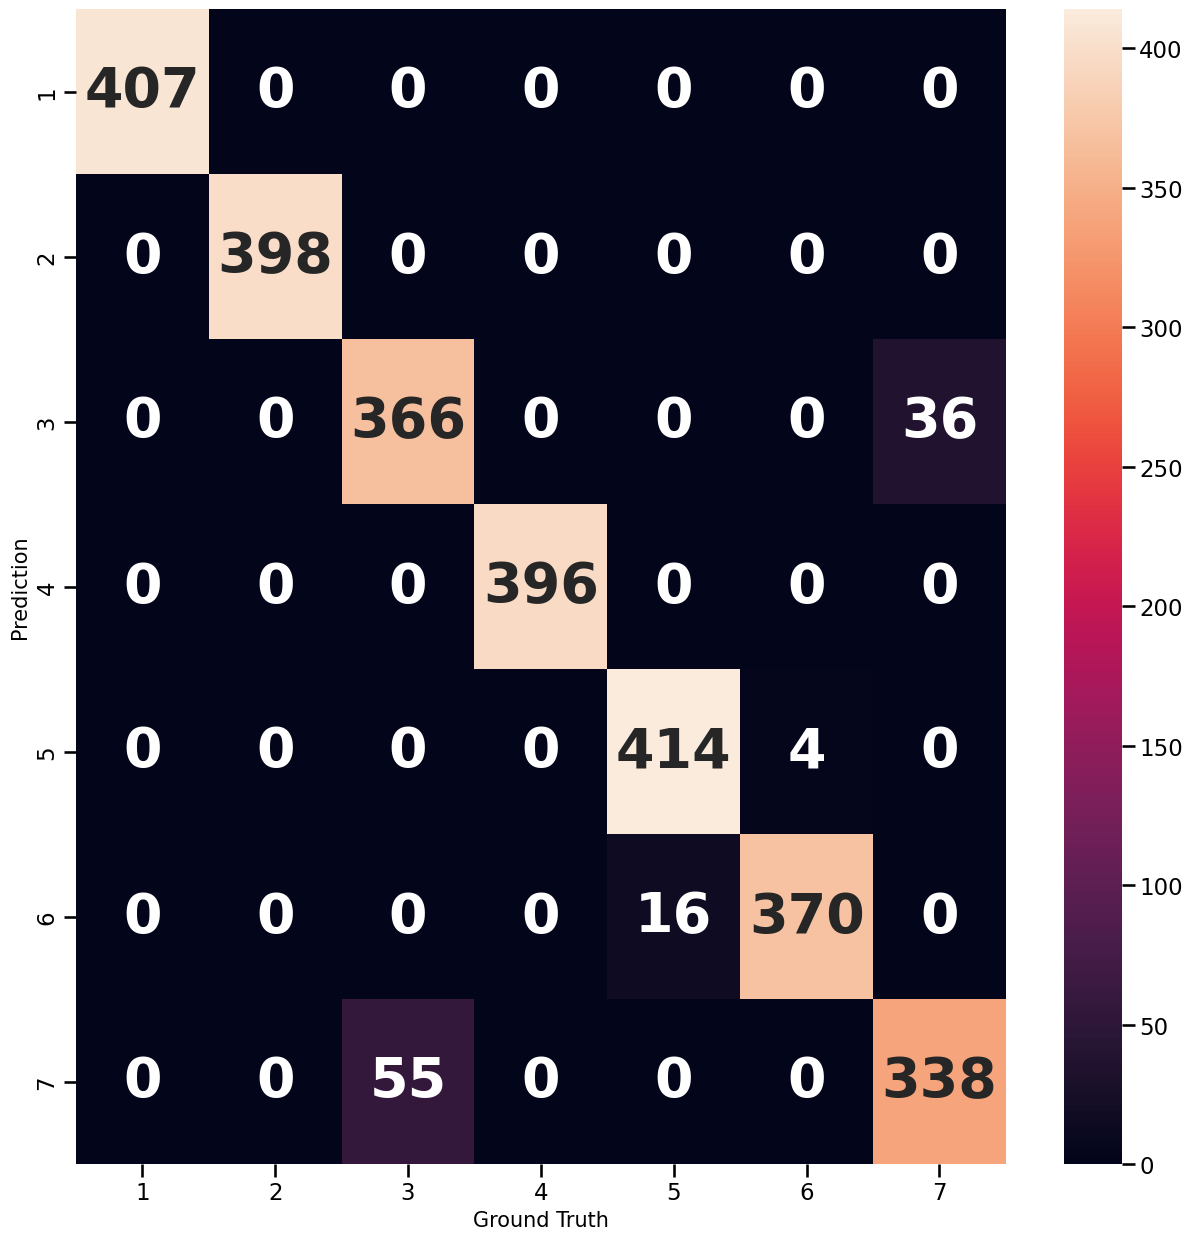

In [16]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## Extreme Gradient Boosting (XGBOOST) Classification

### Algoritma dan Model Matematika

XGBoost (Extreme Gradient Boosting) minimizes the regularized loss function:

\begin{equation}
\mathcal{L}(\phi) = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
\end{equation}

di mana:
- $ n $ adalah jumlah instance pelatihan.
- $ K $ adalah jumlah weak learners (pohon).
- $ \phi $ merepresentasikan parameter model.
- $ L(y_i, \hat{y}_i) $ adalah fungsi kerugian individu instance.
- $ \Omega(f_k) $ adalah term regularisasi untuk weak learner ke-$ k $.

### Loss/Cost Function

Fungsi kerugian softmax untuk klasifikasi multikelas adalah:

\begin{equation}
L(y_i, \hat{p}_{ik}) = -\sum_{k=1}^{K} y_{ik} \ln(\hat{p}_{ik})
\end{equation}

di mana:
- $ y_{ik} $ adalah indikator biner keanggotaan kelas.
- $ \hat{p}_{ik} $ adalah probabilitas prediksi instance $ i $ untuk kelas $ k $.

### Optimisasi

XGBoost mengoptimalkan fungsi tujuan melalui kerangka kerja gradient boosting, dengan menambahkan weak learners secara berurutan untuk mengoreksi residu. Optimasi mengurangi fungsi tujuan terregularisasi menggunakan teknik seperti gradien descent.

1. **Hitung Gradien Negatif:**
   $ \text{Negative Gradient} = -\nabla_{\hat{y}_i} L(y_i, \hat{y}_i) $

2. **Pasang Weak Learner (Pohon):**
   Pasang pohon $ h_k(x) $ pada gradien negatif.

3. **Perbarui Model:**
   Perbarui model $ \hat{y}_i $ menggunakan tingkat pembelajaran $ \eta $:
   $ \hat{y}_i^{(t+1)} = \hat{y}_i^{(t)} + \eta h_k(x_i) $

4. **Hitung Residu Baru:**
   Perbarui residu:
   $ r_{ik}^{(t+1)} = y_{ik} - \hat{p}_{ik}^{(t)} $

### Parameter Pembaruan:
Parameter pembaruan melibatkan penyesuaian bobot setiap weak learner dalam prediksi akhir:
$ \hat{y}_i = \sum_{k=1}^{K} \eta h_k(x_i) $


## Pseudocode

### Inisialisasi
- Inisialisasi dataset: $(D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\})$ di mana \(N\) adalah jumlah sampel.
- Tetapkan jumlah kelas: \(C\).
- Inisialisasi parameter: $(\text{learning\_rate} (\eta), \text{num\_trees} (K), \text{max\_depth}, \text{objective\_function}, \text{features}, \text{subsample}, \text{colsample\_bytree})$, dll.

### Loop Pelatihan
- Untuk \(k = 1\) hingga \(K\):
  - Hitung gradien negatif: $(\nabla_{\theta} \text{Loss})$ untuk setiap kelas.
  - Perbarui nilai daun berdasarkan gradien negatif.
  - Terapkan regularisasi (misalnya, regularisasi L1 atau L2).
  - Perbarui struktur pohon dengan membagi daun.
  - Potong pohon untuk menghindari overfitting.
  - Perbarui bobot untuk setiap daun berdasarkan struktur baru.
  - Hitung kerugian pelatihan untuk pemantauan.

### Prediksi
- Untuk sampel baru \(x\):
  - Lewati \(x\) melalui semua pohon untuk mendapatkan skor kelas.
  - Prediksi kelas dengan skor tertinggi.

In [17]:
import xgboost as xgb

model = xgb.XGBClassifier(
    min_child_weight=1,
    max_depth=5,
    n_estimators=100,
    gamma=1
)

shift_y_train = y_train - 1
model.fit(X_train, shift_y_train)

shift_y_pred = model.predict(X_test)
y_pred = shift_y_pred + 1

accuracy_XGB = accuracy_score(y_test, y_pred)*100
precision_XGB = precision_score(y_test, y_pred, average='weighted')*100
recall_XGB = recall_score(y_test, y_pred, average='weighted')*100
f1_XGB = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_XGB}","%")
print(f"Precision: {precision_XGB}","%")
print(f"Recall: {recall_XGB}","%")
print(f"F1: {f1_XGB}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

Accuracy: 95.32142857142857 %
Precision: 95.31881851169463 %
Recall: 95.32142857142857 %
F1: 95.30110193046129 %


1           2           3           4           5  \
precision    0.997549    0.977833    0.869880    0.992424    0.953052   
recall       1.000000    0.997487    0.898010    0.992424    0.971292   
f1-score     0.998773    0.987562    0.883721    0.992424    0.962085   
support    407.000000  398.000000  402.000000  396.000000  418.000000   

                    6           7  accuracy    macro avg  weighted avg  
precision    0.971053    0.910569  0.953214     0.953194      0.953188  
recall       0.955959    0.854962  0.953214     0.952876      0.953214  
f1-score     0.963446    0.881890  0.953214     0.952843      0.953011  
support    386.000000  393.000000  0.953214  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

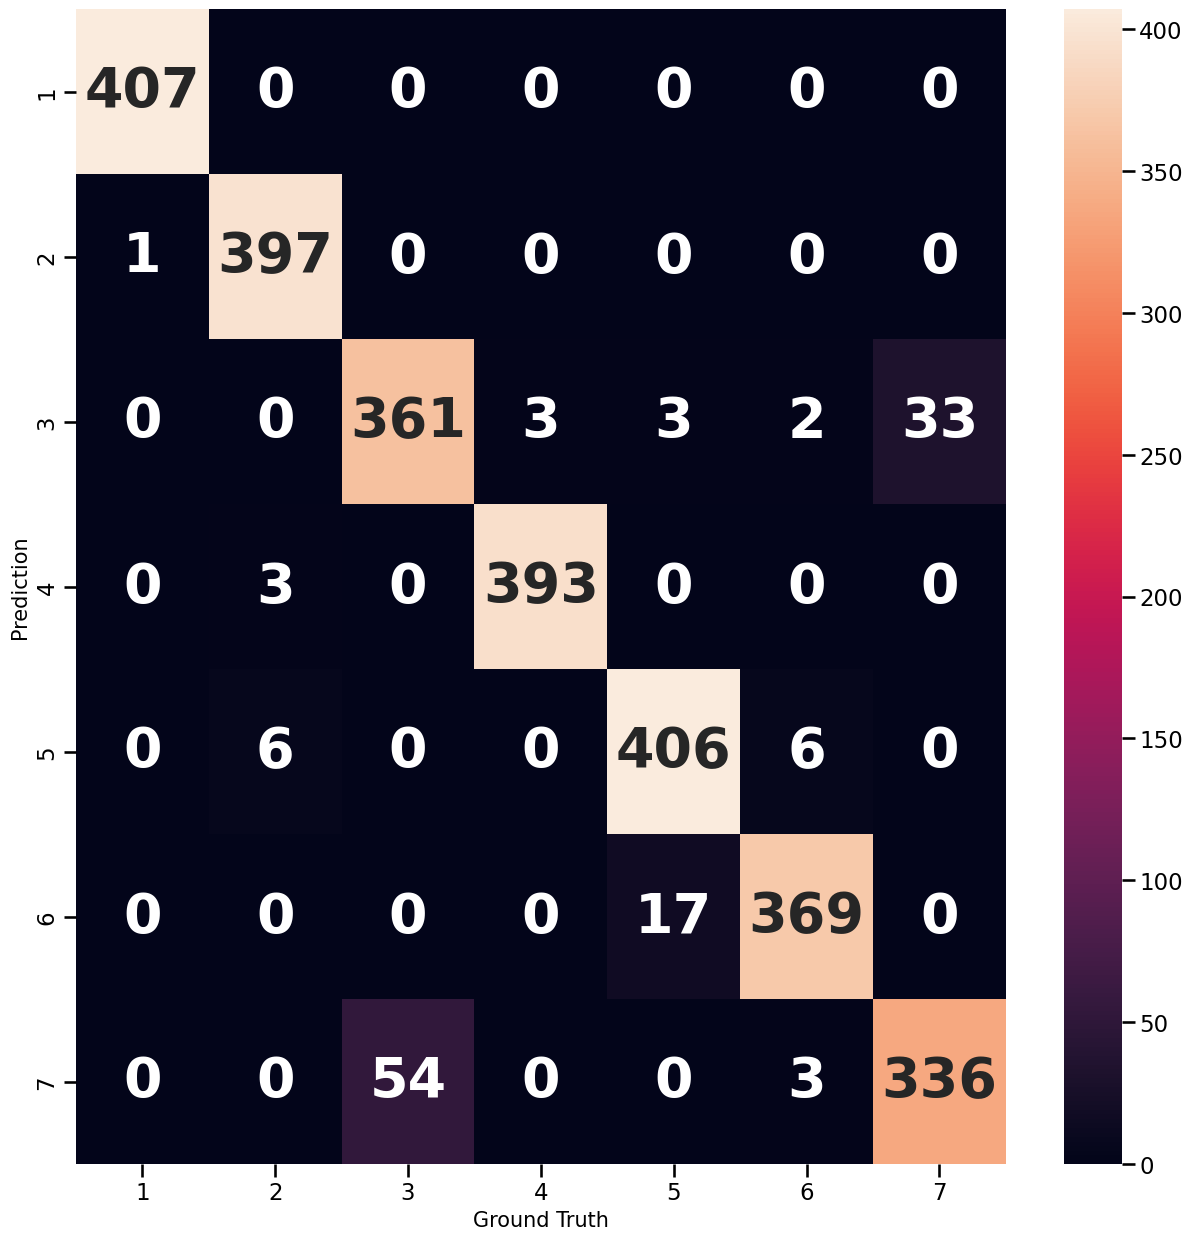

In [18]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

## Light Gradient Boosting (LightGBM) Classification

LightGBM membangun kumpulan pohon keputusan secara berurutan. Tujuannya adalah meminimalkan fungsi kerugian yang dapat dibedakan. LightGBM menggunakan strategi pertumbuhan pohon berbasis daun, fokus pada ekspansi daun dengan delta kerugian maksimum untuk efisiensi.

- Strategi Pertumbuhan Pohon:
  - LightGBM menggunakan strategi pertumbuhan pohon berbasis daun alih-alih pendekatan berbasis tingkat.
  - Memilih daun dengan delta kerugian terendah, memastikan penurunan kerugian terbesar.
  - Menghasilkan penurunan kerugian dibandingkan metode berbasis tingkat.

- One-Sided Sampling Berbasis Gradien (GOSS):
  - Mengimplementasikan sampling satu sisi berdasarkan gradien.
  - Menyeimbangkan reduksi data dan akurasi dengan memberikan bobot lebih besar pada instance dengan gradien lebih tinggi.

- Exclusive Feature Building (EFB):
  - Mengurangi jumlah fitur dengan menggabungkan fitur yang saling eksklusif.
  - Teknik baru untuk meminimalkan redundansi fitur.

- Kompleksitas Pelatihan dan Kecepatan:
  - LightGBM bertujuan mengurangi kompleksitas pelatihan untuk pelatihan yang lebih cepat dan prediksi yang ditingkatkan.
  - Menggunakan GOSS dan EFB untuk mencapai tujuan ini.

- Perbedaan dengan Algoritma lain:
  - Menggunakan algoritma GOSS untuk membagi sampel pelatihan menjadi subsampel yang lebih kecil.
  - Menggunakan strategi pertumbuhan berbasis daun, membedakannya dari metode berbasis gradien lainnya.

### Model Matematis
Model adalah kumpulan pohon keputusan $F(x)$, di mana prediksi akhir adalah jumlah prediksi dari semua pohon:
\begin{equation}
    \hat{y}_i = \sum_{k=1}^{K} F_k(x_i)
\end{equation}
Di mana:
- $K$ adalah jumlah pohon.

### Fungsi Cost untuk Klasifikasi Multikelas
Untuk klasifikasi multikelas, umumnya digunakan fungsi categorical cross entropy:
\begin{equation}
    \text{CrossEntropyLoss} = -\sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \cdot \log(p_{ij})
\end{equation}
Di mana:
- $N$ adalah jumlah sampel,
- $C$ adalah jumlah kelas,
- $y_{ij}$ adalah fungsi indikator,
- $p_{ij}$ adalah probabilitas prediksi.

### Optimisasi
LightGBM menggunakan pendekatan optimisasi berbasis gradien. Algoritma memperbarui parameter $\theta$ dengan meminimalkan gradien negatif fungsi kerugian:
\begin{equation} 
    \theta_k = \theta_{k-1} - \eta \cdot \nabla_{\theta} \text{Loss}
\end{equation}
Di mana:
- $\eta$ adalah tingkat pembelajaran.

### Pembaruan Parameter
Pembaruan parameter dapat menggunakan algoritma pembaruan seperti Gradien Descent, Mini-Batch Gradien Descent, atau Stochastic Gradien Descent.


## Pseudocode
Algoritma klasifikasi multikelas LightGBM dapat diuraikan dalam pseudokode sebagai berikut:

### Inisialisasi
- Inisialisasi dataset: $(D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\})$ di mana \(N\) adalah jumlah sampel.
- Tetapkan jumlah kelas: \(C\).
- Inisialisasi parameter: $(\text{learning\_rate} (\eta), \text{num\_trees} (K), \text{max\_depth}, \text{objective\_function}, \text{features}, \text{boosting\_type}, \text{min\_data\_in\_leaf})$, dll.

### Loop Pelatihan
- Untuk \(k = 1\) hingga \(K\):
  - Hitung gradien negatif: $(\nabla_{\theta} \text{Loss})$ untuk setiap kelas.
  - Perbarui nilai daun berdasarkan gradien negatif.
  - Terapkan regularisasi jika ditentukan.
  - Perbarui struktur pohon dengan membagi daun.
  - Potong pohon untuk menghindari overfitting.
  - Perbarui bobot untuk setiap daun berdasarkan struktur baru.
  - Hitung kerugian pelatihan untuk pemantauan.

### Prediksi
- Untuk sampel baru \(x\):
  - Lewati \(x\) melalui semua pohon untuk mendapatkan probabilitas kelas.
  - Prediksi kelas dengan probabilitas tertinggi.

In [19]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    num_leaves=30,
    num_iterations=150,
    max_bin=60
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_LGB = accuracy_score(y_test, y_pred)*100
precision_LGB = precision_score(y_test, y_pred, average='weighted')*100
recall_LGB = recall_score(y_test, y_pred, average='weighted')*100
f1_LGB = f1_score(y_test, y_pred, average='weighted')*100
print(f"Accuracy: {accuracy_LGB}","%")
print(f"Precision: {precision_LGB}","%")
print(f"Recall: {recall_LGB}","%")
print(f"F1: {f1_LGB}","%")
report = classification_report(y_test, y_pred, output_dict=True)
report = pd.DataFrame(report)
report

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 10
[LightGBM] [Info] Start training from score -1.950295
[LightGBM] [Info] Start training from score -1.944661
[LightGBM] [Info] Start training from score -1.947161
[LightGBM] [Info] Start training from score -1.943413
[LightGBM] [Info] Start training from score -1.957224
[LightGBM] [Info] Start training from score -1.937198
[LightGBM] [Info] Start training from score -1.941545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

1      2           3      4           5           6  \
precision    1.0    1.0    0.866983    1.0    0.962704    0.986667   
recall       1.0    1.0    0.907960    1.0    0.988038    0.958549   
f1-score     1.0    1.0    0.886999    1.0    0.975207    0.972405   
support    407.0  398.0  402.000000  396.0  418.000000  386.000000   

                    7  accuracy    macro avg  weighted avg  
precision    0.901070  0.959286     0.959632      0.959611  
recall       0.857506  0.959286     0.958865      0.959286  
f1-score     0.878748  0.959286     0.959051      0.959252  
support    393.000000  0.959286  2800.000000   2800.000000

Text(0.5, 119.0833333333333, 'Ground Truth')

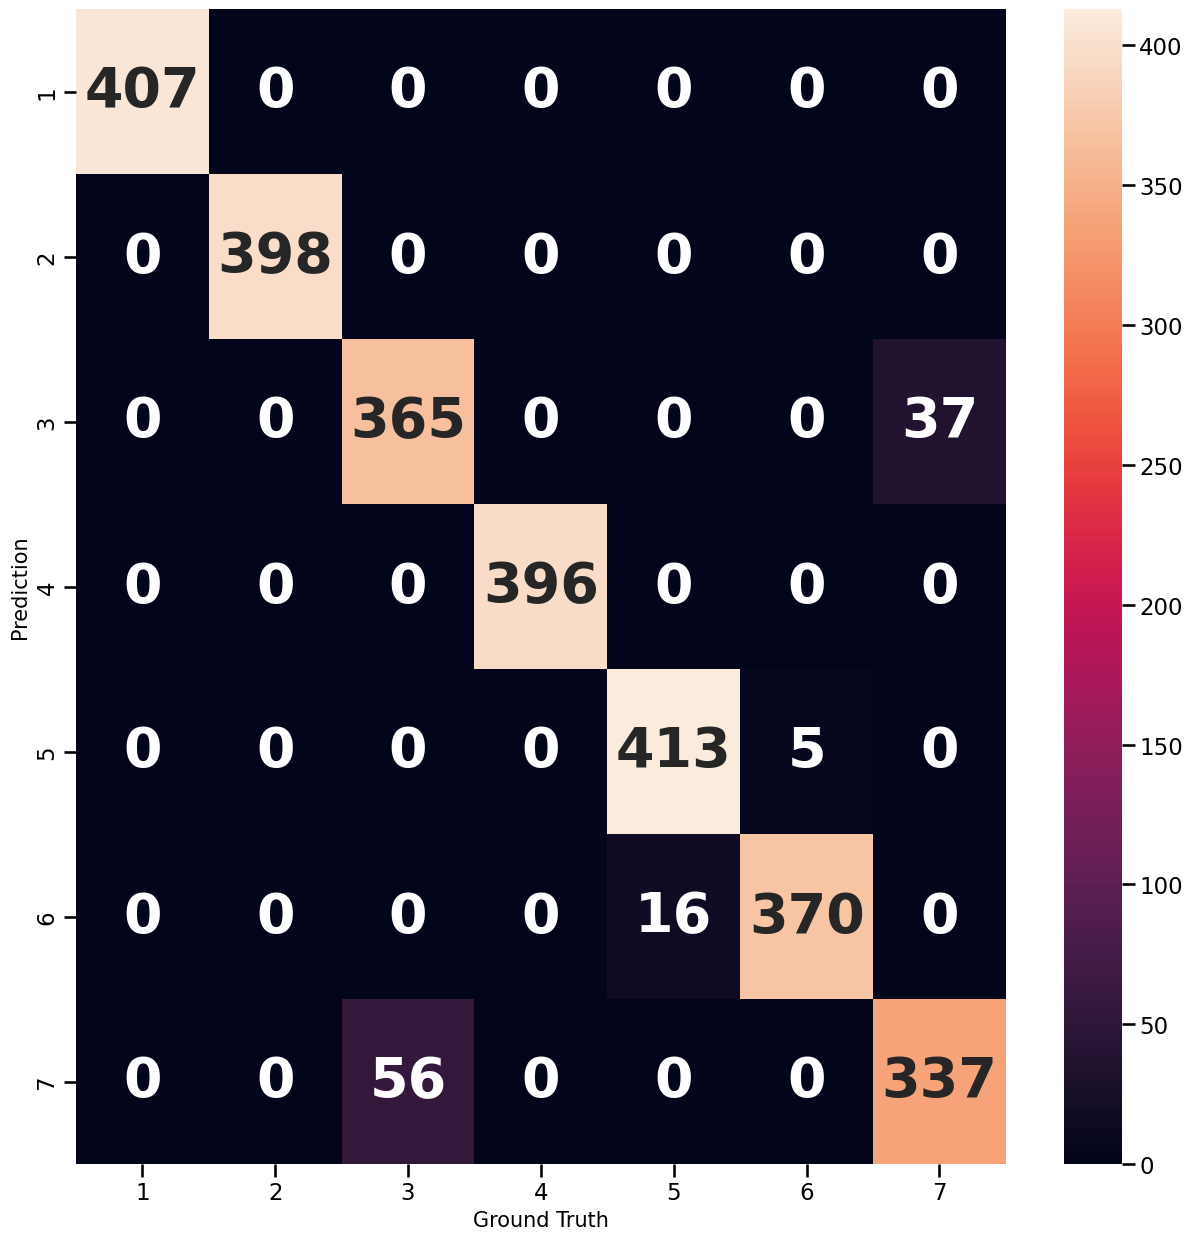

In [20]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7], minor=False)
ax.set_ylabel('Prediction', fontsize=15)
ax.set_xlabel('Ground Truth', fontsize=15)

In [21]:
# Create a dictionary with the scores
scores = {
    'Model': ['LDA','DecisionTree','KNN','GradientBoosting','HistGradientBoosting', 'XGBoost', 'LightGBM'],
    'Accuracy': [accuracy_LDA, accuracy_DTM, accuracy_KNN, accuracy_GBM, accuracy_HGB, accuracy_XGB, accuracy_LGB],
    'Precision': [precision_LDA, precision_DTM, precision_KNN, precision_GBM, precision_HGB, precision_XGB, precision_LGB],
    'Recall': [recall_LDA, recall_DTM, recall_KNN, recall_GBM, recall_HGB, recall_XGB, recall_LGB],
    'F1': [f1_LDA, f1_DTM, f1_KNN, f1_GBM, f1_HGB, f1_XGB, f1_LGB]
}

# Create the dataframe
scores_df = pd.DataFrame(scores)

# Display the dataframe
scores_df

Model   Accuracy  Precision     Recall         F1
0                   LDA  73.892857  75.519999  73.892857  73.727548
1          DecisionTree  93.428571  93.428413  93.428571  93.428413
2                   KNN  73.785714  74.067867  73.785714  73.201073
3      GradientBoosting  96.214286  96.252948  96.214286  96.210578
4  HistGradientBoosting  96.035714  96.070410  96.035714  96.032390
5               XGBoost  95.321429  95.318819  95.321429  95.301102
6              LightGBM  95.928571  95.961115  95.928571  95.925222